In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Import and Process Training Images using Kears

In [ ]:
# Parameters
image_size = (150, 150)  # Resize all images to 32x32
dataset_path = "train/"  # Path to your dataset folder

# Initialize empty lists to store data
images = []
labels = []

# Loop through each folder
for category in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, category)
    label = 0 if category == "Female" else 1  # Assign labels based on folder name

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Load and preprocess the image
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Convert to array and normalize
        images.append(img_array)
        labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (322, 150, 150, 3)
Labels shape: (322,)


0


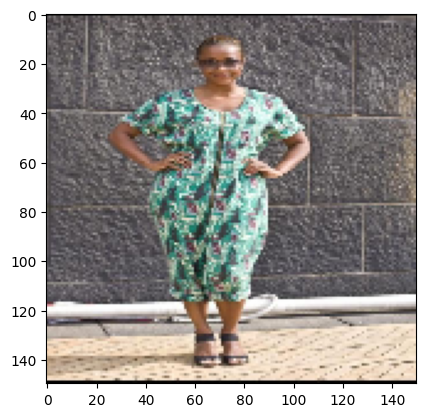

In [ ]:
print(labels[222])
plt.imshow(images[222])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (257, 150, 150, 3), (257,)
Testing set: (65, 150, 150, 3), (65,)


In [ ]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Training set: {X_test.shape}, {y_test.shape}")

Training set: (257, 150, 150, 3), (257, 1)
Training set: (65, 150, 150, 3), (65, 1)


# Traing CNN

In [ ]:
CNN = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Dense Network
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

CNN.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

CNN.fit(X_train, y_train, epochs = 5, batch_size=25)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 563ms/step - accuracy: 0.5203 - loss: 1.0812
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 656ms/step - accuracy: 0.6101 - loss: 0.6831
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 536ms/step - accuracy: 0.6471 - loss: 0.6221
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 601ms/step - accuracy: 0.7727 - loss: 0.5196
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 683ms/step - accuracy: 0.8146 - loss: 0.3787


# Save Model as .PKL

In [ ]:
import pickle

with open("CNN_Male_Female_Image_Classifier.pkl", "wb") as file:
    pickle.dump(CNN, file)

# Random Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Our Model Predicted it's a Male


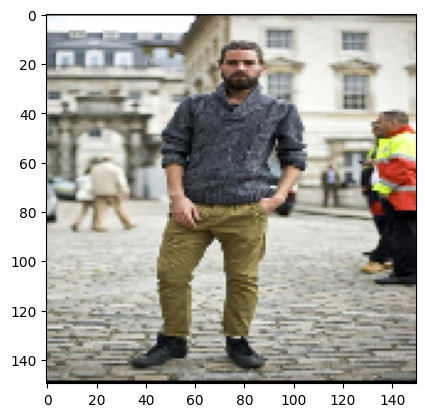

In [ ]:
plt.imshow(X_test[22])
plt.show

y_pred = CNN.predict(X_test[22].reshape(1, 150,150,3))
if y_pred > 0.5:
    pred = 'Male'
else:
    pred = 'Female'
print(f"Our Model Predicted it's a {pred}")